In [1]:
!pip install tensorflow

     |████████████████████████████████| 173.9 MB 33.9 MB/s eta 0:00:01     |████████████████████████████▋   | 155.8 MB 37.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 29.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 15.6 MB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 17.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 116 kB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 23.2 MB/s eta 0:00:01
     |███████████████████████████

In [245]:
#Importing necessary libraries
import tensorflow as tf
import tensorflow.keras.layers as L

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as zscore
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection  import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [246]:
#Importing the dataset
df_bank = pd.read_csv("bank.csv")

In [5]:
#Displaying the first five column of the dataset
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Shape of the dataset
df_bank.shape

(10000, 14)

In [7]:
#checking data types
df_bank.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
#Checking null values
df_bank.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Checking the number of unique values in each columns
df_bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
#Statistical summary of the dataset
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Feature Elimination

In [247]:
#Let's remove the unique IDs columns for further analysis
df1_bank = df_bank.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [19]:
df1_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Bivariate Analysis

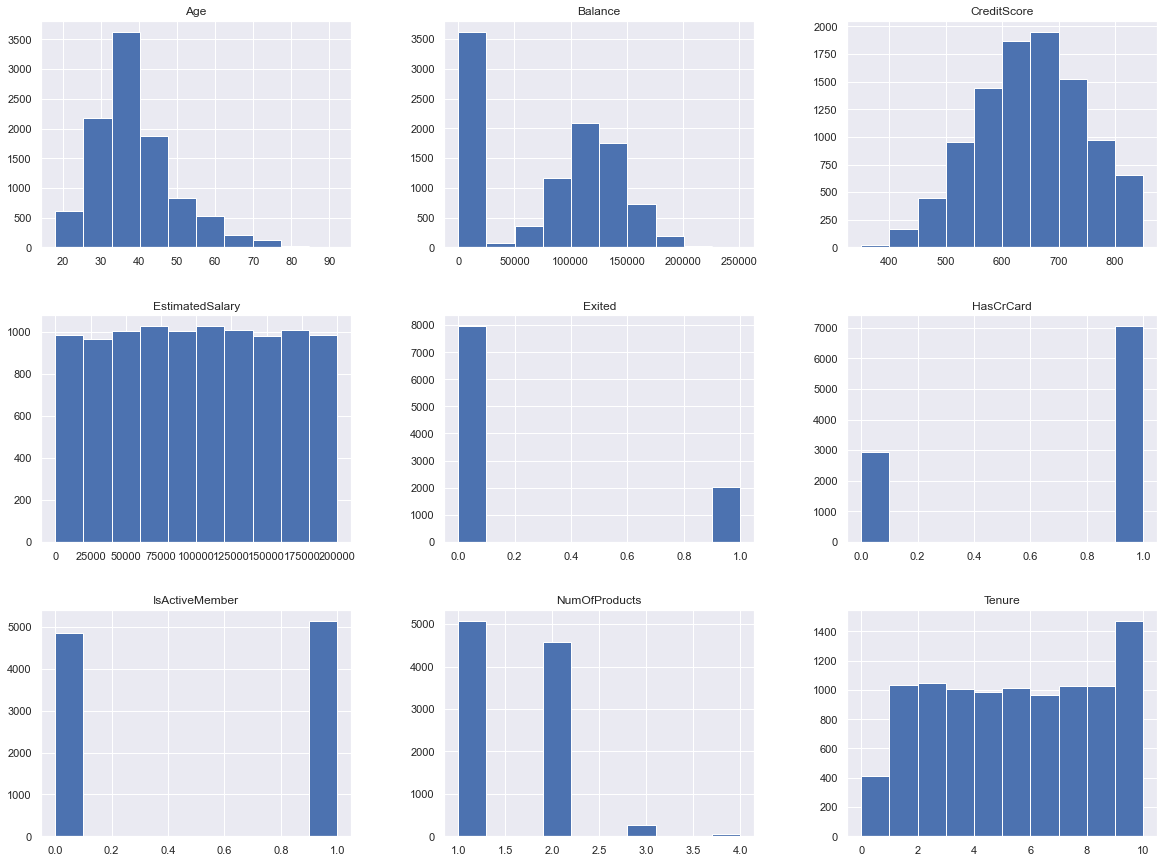

In [12]:
#Plotting the columns in histogram
df1_bank.hist(bins=10, figsize=(20,15));

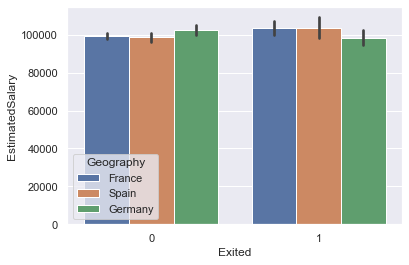

In [13]:
# Let's plot the relation between predictor variables and target columns
# Barplot between EstimatedSalary, Geography against Exited column
sns.barplot(df1_bank["Exited"], df1_bank["EstimatedSalary"], hue = df1_bank["Geography"]);

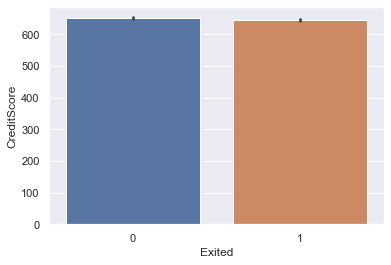

In [14]:
#Barplot between Exited and CreditScore
sns.barplot(df1_bank["Exited"], df1_bank["CreditScore"]);

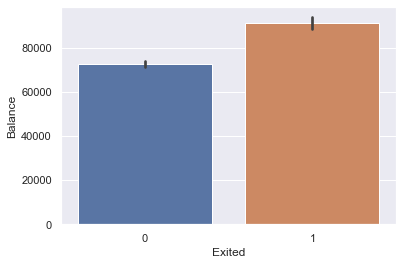

In [15]:
#Barplot between Exited and Balance
sns.barplot(df1_bank["Exited"], df1_bank["Balance"]);

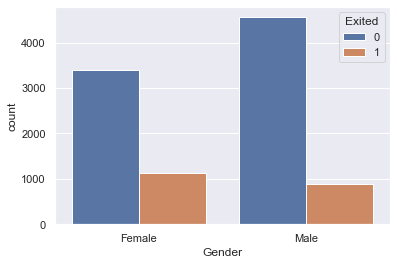

In [17]:
#Countplot between Exited and Gender
sns.countplot(x ="Gender", hue ="Exited", data = df1_bank);

##### Observation
- From the above barplots and countplots, we can see there is no diret impact or relationship on the customers exiting the bank based on several factors like country, balance, creditscore and gender.

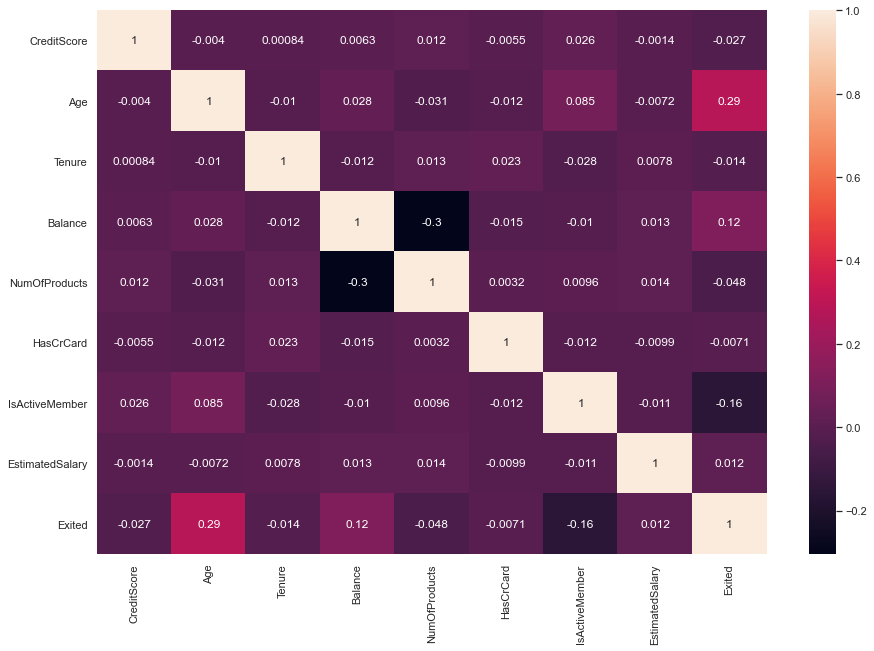

In [21]:
#Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df1_bank.corr(), annot=True)

plt.show();


- From the above heatmap we can see that Age and Balnce has positive correlation with target variable comapred with others.
- There is noticeable negative correlation of IsActiveMember with target variable compared to other negatively correlated variable.

### Data Split

In [39]:
#Separiting dependent and independent variables
X = df1_bank.iloc[:,:10]
Y = df1_bank.iloc[:,10]

In [40]:
#Creating dummy variables for categrical variables Geograohy and Gender
Dummy_Geography = pd.get_dummies(X['Geography'])
Dummy_Gender = pd.get_dummies(X['Gender'])

In [41]:
X = pd.concat([X, Dummy_Geography, Dummy_Gender],axis=1)
X = X.drop(['Geography','Gender'],axis=1)

In [42]:
# Split the data up in train and test sets with 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

### Normalization

In [255]:
from sklearn.preprocessing import StandardScaler

#UApplying Data Standarization method to normalize the data
scaler = StandardScaler().fit(X_train)

#Scaling the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train.shape

(7000, 13)

### Modelling

In [309]:
#Using Tensorflow Keras for modelling

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


#Initializing the constructor
modelA = Sequential()

In [310]:
#Defining the model with activation function as relu
#Addding the first hidden layer
modelA.add(Dense(20, activation = "relu"))

#output layer
modelA.add(Dense(1))

In [311]:
#Applying the learning rate 0.01
sgd = tf.keras.optimizers.Adam(lr = 0.01)

In [312]:
#compiling the model
modelA.compile(loss = "binary_crossentropy", optimizer = sgd, metrics= ["accuracy"])

In [313]:
modelA.fit(X_train, y_train, epochs = 10, batch_size = 300, validation_split = 0.2, verbose = 1)

Epoch 1/10
19/19 [==============================] - 1s 9ms/step - loss: 2.7459 - accuracy: 0.6550 - val_loss: 1.7443 - val_accuracy: 0.7757
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6278 - accuracy: 0.7654 - val_loss: 1.4818 - val_accuracy: 0.7621
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.9305 - accuracy: 0.7187 - val_loss: 2.2216 - val_accuracy: 0.7179
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 2.4377 - accuracy: 0.7126 - val_loss: 2.0535 - val_accuracy: 0.7507
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 2.1153 - accuracy: 0.7244 - val_loss: 1.7914 - val_accuracy: 0.7529
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7372 - accuracy: 0.7579 - val_loss: 2.0764 - val_accuracy: 0.7957
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 1.9531 - accuracy: 0.7925 - val_loss: 2.1349 - val_accuracy: 0.7729
Epoch 8/10
19/19 [==

##### Observation
- We can see the accuracy of the model is 0.7695 which can be increased.
- We can try enhance accuracy of the model by changing the activation function from "relu" to "sigmoid"

In [318]:
#Initializing the constructor
modelB = Sequential()

#Defining the model with activation function as sigmoid
#Addding the first hidden layer
modelB.add(Dense(20, activation= "sigmoid"))

#output layer
modelB.add(Dense(1))

In [319]:
#Applying the learning rate 0.01
sgd = tf.keras.optimizers.Adam(lr = 0.01)

In [320]:
#compiling the model
modelB.compile(loss = "binary_crossentropy", optimizer = sgd, metrics= ["accuracy"])

In [321]:
modelB.fit(X_train, y_train, epochs = 15, batch_size = 300, validation_split = 0.2, verbose = 1)

Epoch 1/15
19/19 [==============================] - 0s 8ms/step - loss: 3.0389 - accuracy: 0.8030 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 3.2452 - accuracy: 0.7896 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 3.2737 - accuracy: 0.7878 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 4/15
19/19 [==============================] - 0s 3ms/step - loss: 3.1602 - accuracy: 0.7951 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 3.1683 - accuracy: 0.7946 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 3.2694 - accuracy: 0.7880 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 3.1612 - accuracy: 0.7951 - val_loss: 3.1731 - val_accuracy: 0.7943
Epoch 8/15
19/19 [==

##### Observation
- It definitely increase the accuracy of the model to 0.7976
- Now we can try adding more hidden layer and increasing the number of nodes to further increase the accuracy of the model using activation function as Relu and Sigmoid


In [326]:
#Initializing the constructor
modelC = Sequential()

#Defining the model with activation function as sigmoid
#Addding the first hidden layer
modelC.add(Dense(100, activation= "relu"))

#Addding the second hidden layer
modelC.add(Dense(75, activation= "sigmoid"))

#output layer
modelC.add(Dense(1))

In [327]:
#Applying the learning rate 0.01
sgd = tf.keras.optimizers.Adam(lr = 0.01)

In [328]:
#compiling the model
modelC.compile(loss = "binary_crossentropy", optimizer = sgd, metrics= ["accuracy"])

In [329]:
modelC.fit(X_train, y_train, epochs = 15, batch_size = 300, validation_split = 0.2, verbose = 1)

Epoch 1/15
19/19 [==============================] - 1s 9ms/step - loss: 1.9399 - accuracy: 0.6742 - val_loss: 0.8866 - val_accuracy: 0.8000
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7846 - val_loss: 0.4685 - val_accuracy: 0.8250
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7855 - val_loss: 0.5129 - val_accuracy: 0.7714
Epoch 4/15
19/19 [==============================] - 0s 3ms/step - loss: 1.6492 - accuracy: 0.6325 - val_loss: 2.6819 - val_accuracy: 0.7929
Epoch 5/15
19/19 [==============================] - 0s 3ms/step - loss: 2.3094 - accuracy: 0.7759 - val_loss: 1.5093 - val_accuracy: 0.7614
Epoch 6/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4730 - accuracy: 0.7022 - val_loss: 0.6940 - val_accuracy: 0.7264
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.7662 - val_loss: 0.6549 - val_accuracy: 0.7971
Epoch 8/15
19/19 [==

##### Observation
- We can see the acuuracy is increased to 0.8312 which seems fair but can improved further more
- To further improve the accuracy of the model , let's try using sigmoid function as an output and also increasing the epochs(number of iterations)

In [330]:
#Initializing the constructor
modelD = Sequential()

#Defining the model with activation function as sigmoid
#Addding the first hidden layer
modelD.add(Dense(100, activation = "sigmoid"))

#Addding the second hidden layer
modelD.add(Dense(75, activation = "sigmoid"))

#output layer
modelD.add(Dense(1, activation = "sigmoid"))

In [331]:
#Applying the learning rate 0.01
sgd = tf.keras.optimizers.Adam(lr = 0.01)

In [332]:
#compiling the model
modelD.compile(loss = "binary_crossentropy", optimizer = sgd, metrics= ["accuracy"])

In [333]:
modelD.fit(X_train, y_train, epochs = 50, batch_size = 300, validation_split = 0.2, verbose = 1)

Epoch 1/50
19/19 [==============================] - 0s 9ms/step - loss: 0.6338 - accuracy: 0.6764 - val_loss: 0.4664 - val_accuracy: 0.7943
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7955 - val_loss: 0.4379 - val_accuracy: 0.8071
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.7999 - val_loss: 0.4273 - val_accuracy: 0.8171
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8103 - val_loss: 0.4234 - val_accuracy: 0.8186
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8118 - val_loss: 0.4210 - val_accuracy: 0.8164
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8091 - val_loss: 0.4189 - val_accuracy: 0.8214
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8128 - val_loss: 0.4181 - val_accuracy: 0.8157
Epoch 8/50
19/19 [==

##### Observation
- We can see the acuuracy is increased to 0.8778 which is really good accuracy score after trying diffrent scenarios and activation functions.

In [334]:
#Accuracy and loss for test data
loss, acc = modelD.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.4f"  % acc)
print("Loss: %.4f" % loss)

Accuracy: 0.8667
Loss: 0.3361


##### Observation
- So finally after applying diffrent coditions the accuracy of the model(trainig data) is increased to 0.8778 and 0.8667

### Prediction at 0.5 Threshold

In [335]:
y_predict_prob = model.predict(X_test)
y_predict_class = (y_predict_prob>0.5)
y_predict_class

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False,  True, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False,  True, False]])

.

### Model Performance Evaluation

#### The following conclusions can be drawn by analyzing the model performance in order to increase the accuracy of the model,
- By trying diffrent activation function
- Increasing number of hidden layers
- Increasing number of nodes
- Also by increasing number of iterations(epochs)